Mounted at /content/drive

Processing adenocarcinoma image: 000098 (5).png


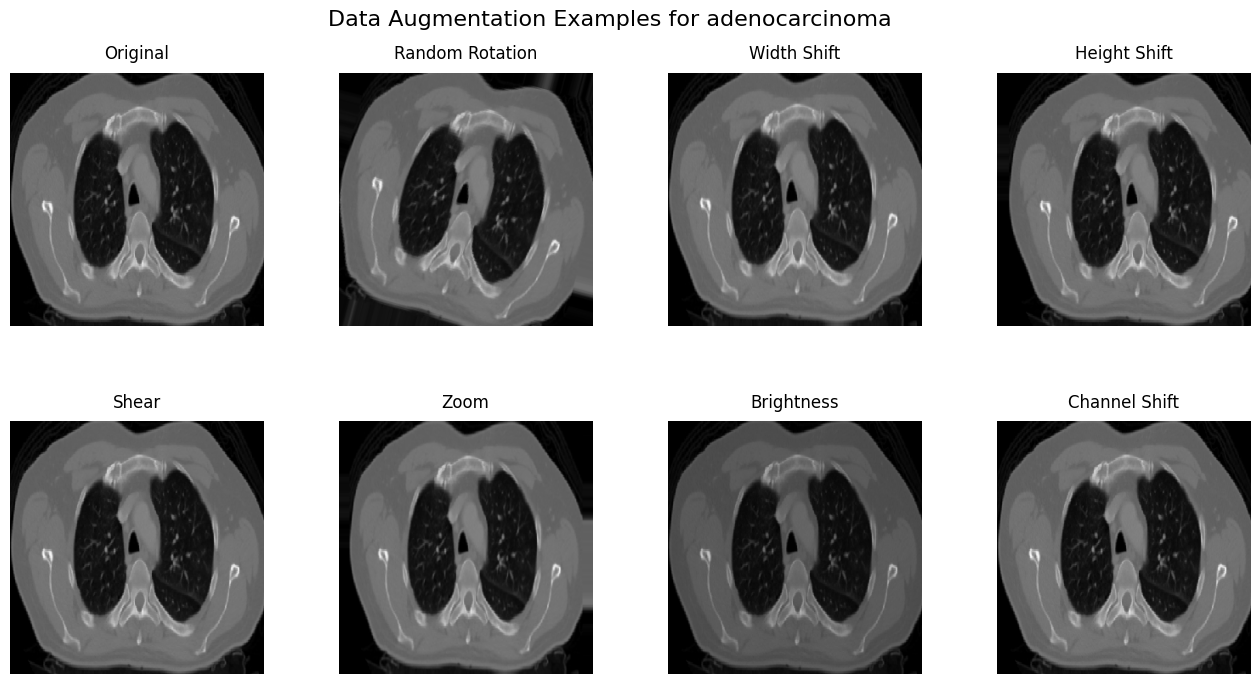


Processing large.cell.carcinoma image: 000159.png


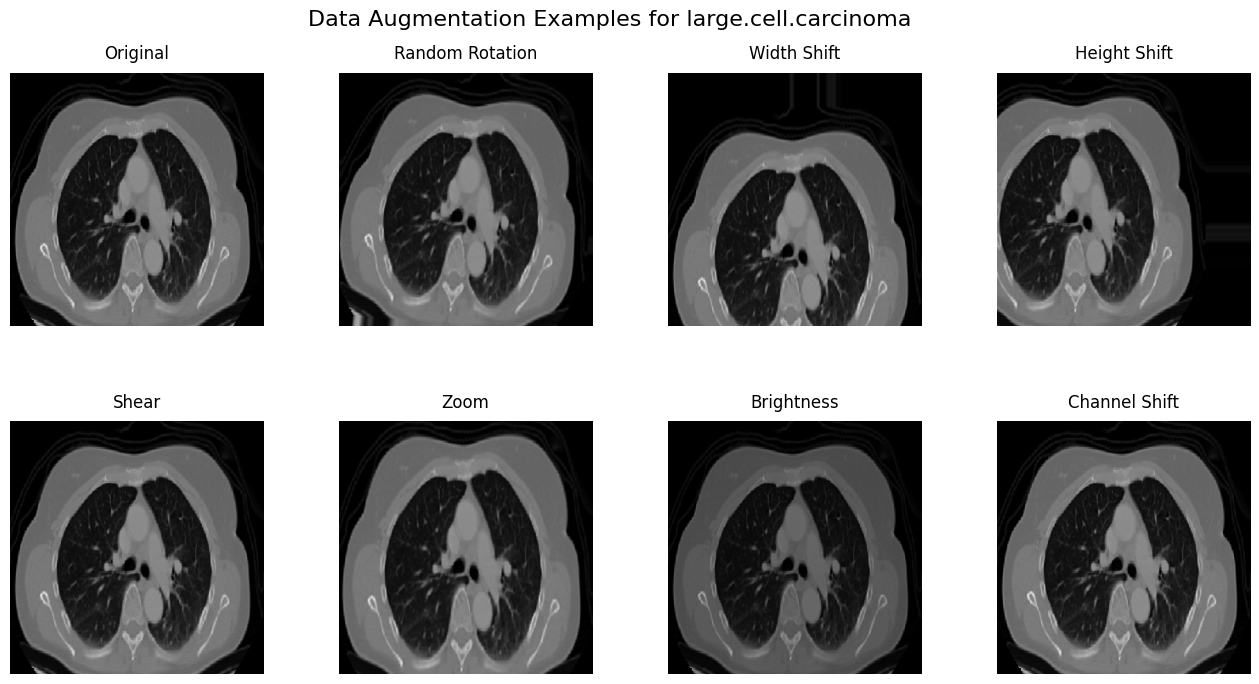


Processing normal image: 13 - Copy - Copy.png


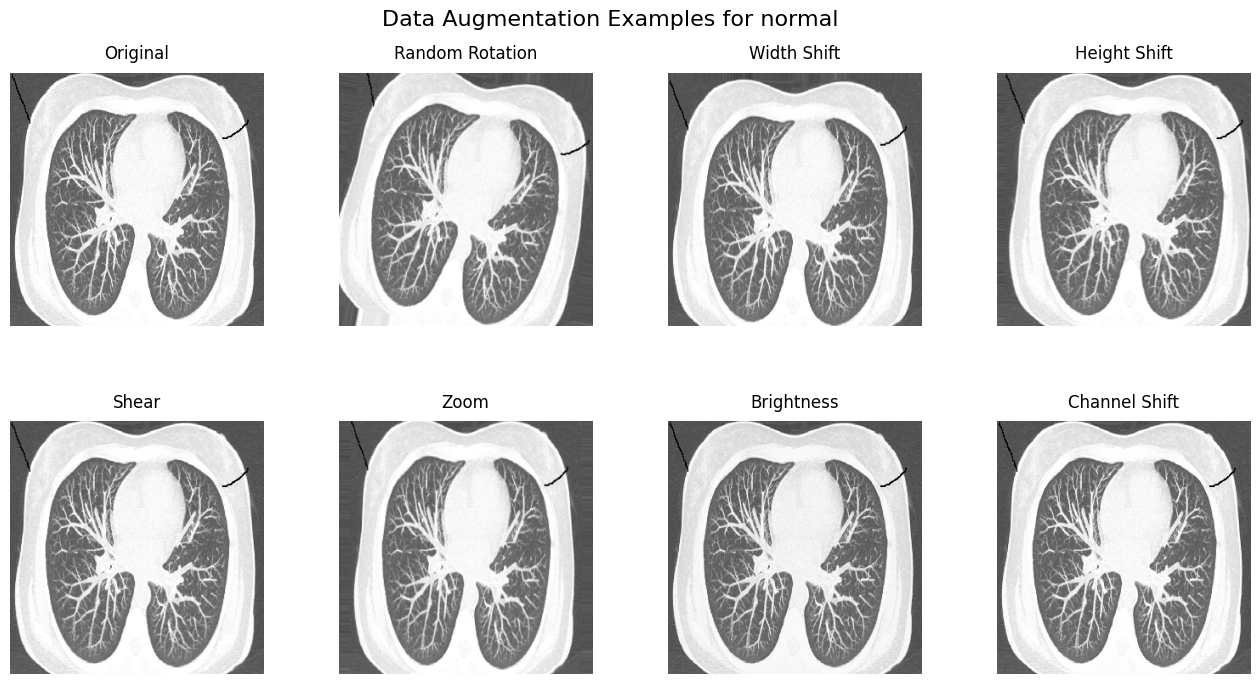


Processing squamous.cell.carcinoma image: 000007.png


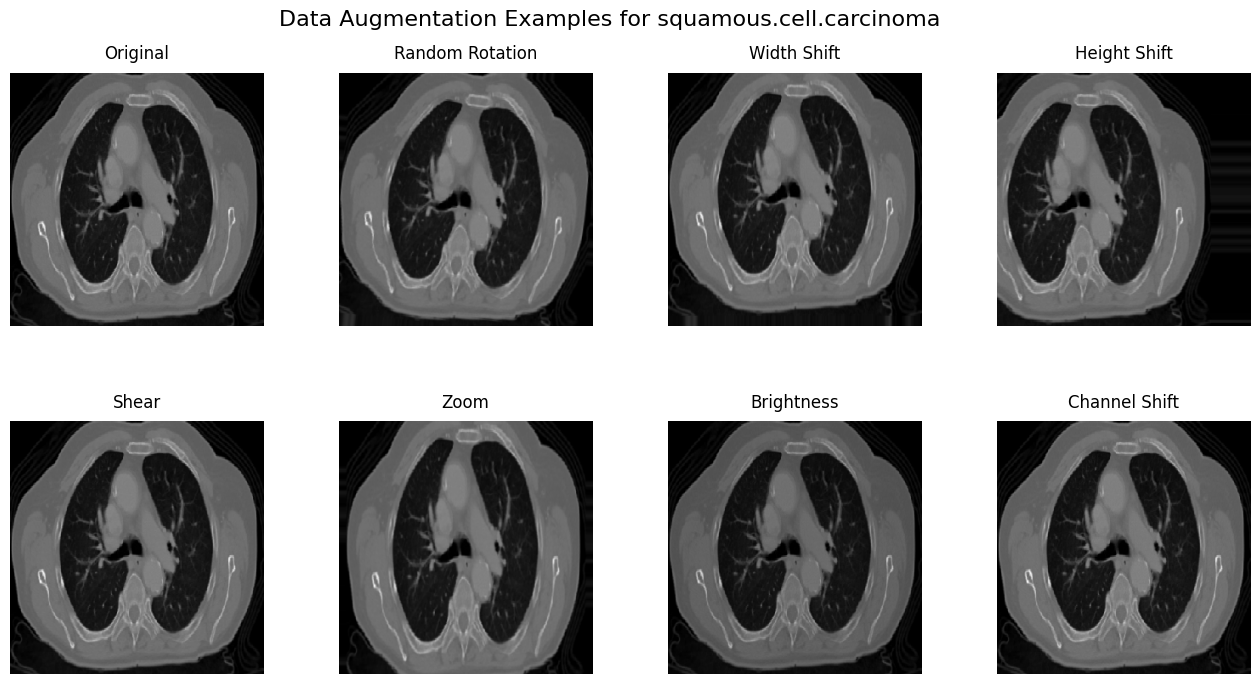

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from google.colab import drive
import random

def mount_drive():
    """Mount Google Drive"""
    drive.mount('/content/drive')
    return '/content/drive/MyDrive/Data'

def create_augmentation_generator():
    """Create ImageDataGenerator with the same parameters as the training model"""
    return ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        zoom_range=0.15,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest',
        brightness_range=[0.7, 1.3],
        channel_shift_range=0.15
    )

def load_and_preprocess_image(image_path):
    """Load and preprocess a single image"""
    img = load_img(image_path, target_size=(299, 299))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def plot_augmented_images(original_image):
    """
    Plot original image and single examples of each augmentation technique in two rows
    """
    # Define augmentation techniques in the order we want to display them
    row1_techniques = {
        "Original": None,
        "Random Rotation": ImageDataGenerator(rotation_range=15),
        "Width Shift": ImageDataGenerator(width_shift_range=0.2),
        "Height Shift": ImageDataGenerator(height_shift_range=0.2)
    }

    row2_techniques = {
        "Shear": ImageDataGenerator(shear_range=0.15),
        "Zoom": ImageDataGenerator(zoom_range=0.15),
        "Brightness": ImageDataGenerator(brightness_range=[0.7, 1.3]),
        "Channel Shift": ImageDataGenerator(channel_shift_range=0.15)
    }

    # Create figure with 2 rows, 4 columns
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

    # Plot first row
    for idx, (technique_name, gen) in enumerate(row1_techniques.items()):
        if technique_name == "Original":
            axes[0, idx].imshow(original_image[0].astype('uint8'))
        else:
            gen.fit(original_image)
            augmented = next(gen.flow(original_image, batch_size=1))
            axes[0, idx].imshow(augmented[0].astype('uint8'))
        axes[0, idx].set_title(technique_name, pad=10)
        axes[0, idx].axis('off')

    # Plot second row
    for idx, (technique_name, gen) in enumerate(row2_techniques.items()):
        gen.fit(original_image)
        augmented = next(gen.flow(original_image, batch_size=1))
        axes[1, idx].imshow(augmented[0].astype('uint8'))
        axes[1, idx].set_title(technique_name, pad=10)
        axes[1, idx].axis('off')

    return fig

def main():
    # Set random seed for reproducibility
    random.seed(42)

    # Mount Google Drive and get dataset path
    dataset_path = mount_drive()

    # Define path to a sample image
    sample_classes = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

    for class_name in sample_classes:
        class_path = os.path.join(dataset_path, 'train', class_name)
        if os.path.exists(class_path):
            # Get list of all images in the class
            images = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
            if images:
                # Randomly select an image
                random_image = random.choice(images)
                image_path = os.path.join(class_path, random_image)
                print(f"\nProcessing {class_name} image: {random_image}")

                # Load and preprocess image
                img_array = load_and_preprocess_image(image_path)

                # Plot original and augmented images
                fig = plot_augmented_images(img_array)

                # Display the plot with class name as title
                plt.suptitle(f"Data Augmentation Examples for {class_name}", fontsize=16, y=0.95)
                plt.show()
                plt.close(fig)

if __name__ == "__main__":
    main()
